In [1]:
#install scikit-learn package
#pip install -U scikit-learn

In [2]:
#import required packages from python library
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#import data visualization packages from python library
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#set seaborn style for white background
sns.set_style('whitegrid')

In [4]:
#to display graph in notebook
%matplotlib inline

In [5]:
# import boston house dataset from scikit-learn package
from sklearn.datasets import load_boston

In [6]:
#create an object of boston dataset 
boston = load_boston()

In [7]:
#check what dataset contains with DESCR function
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

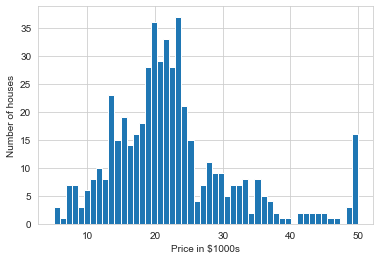

In [17]:
#plot a histogram for the target values (in our case is the house price)
plt.hist(boston.target,bins=50)
plt.xlabel("Price in $1000s")
plt.ylabel("Number of houses")

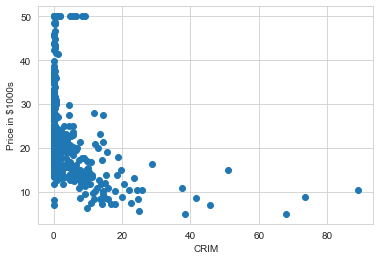

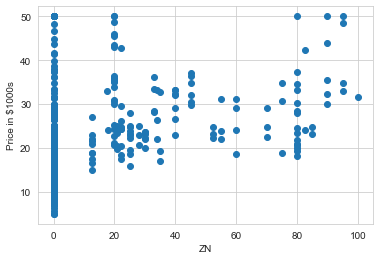

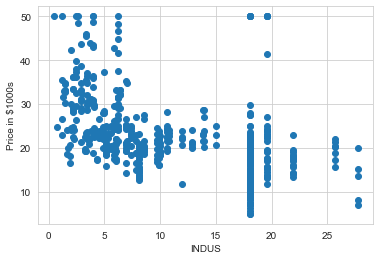

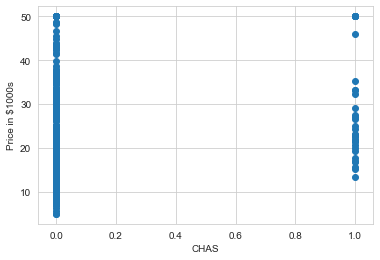

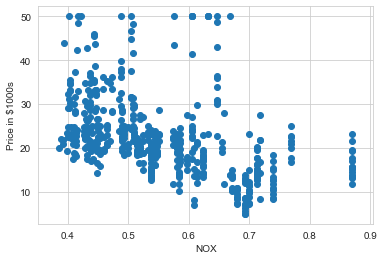

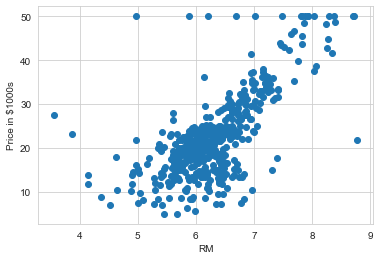

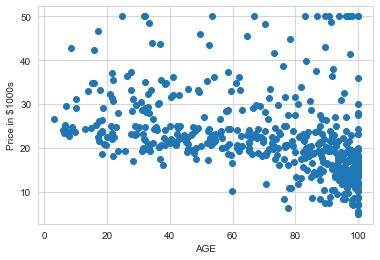

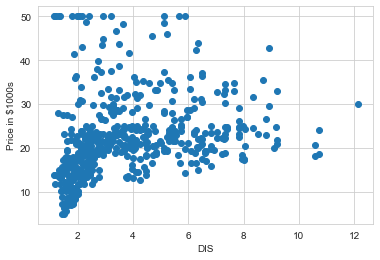

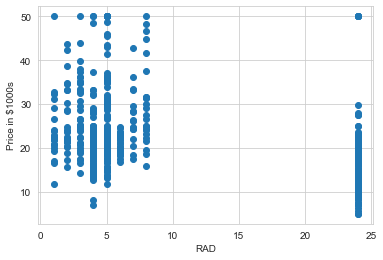

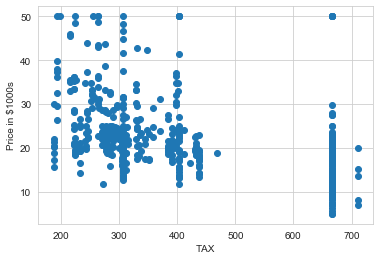

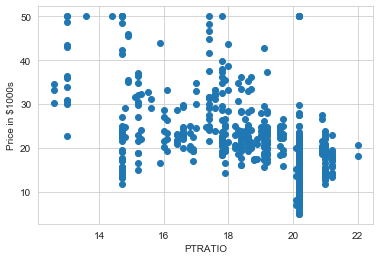

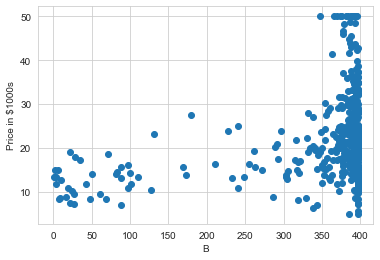

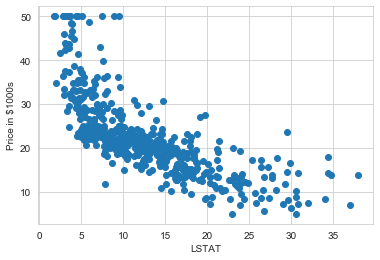

In [19]:
#check the relation between every feature with the target variable (Price)
for i in range(13):
    plt.scatter(boston.data[:,i],boston.target)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("Price in $1000s")
    plt.show()

RM feature shows the best relation with the target variable (Price)

In [10]:
#convert the boston dataset into pandas Dataframe
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
boston_df.head()  # display first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


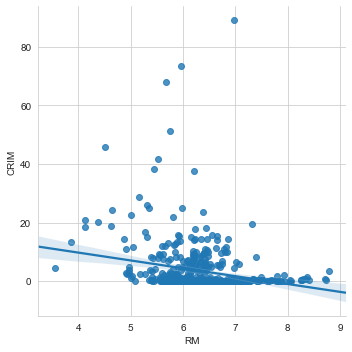

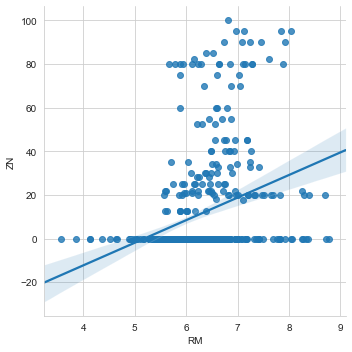

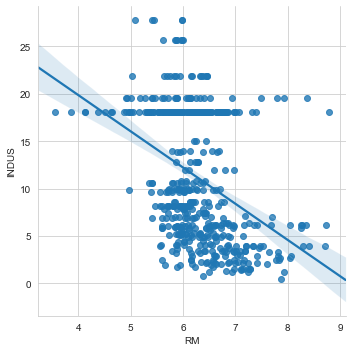

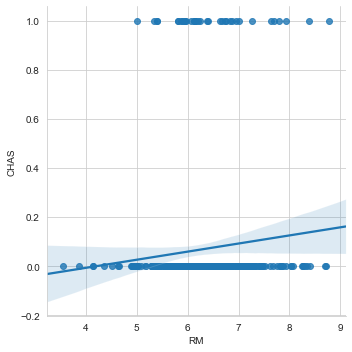

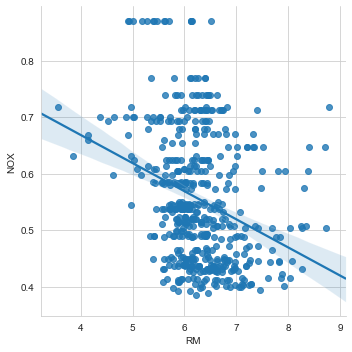

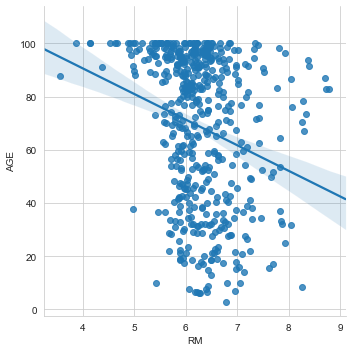

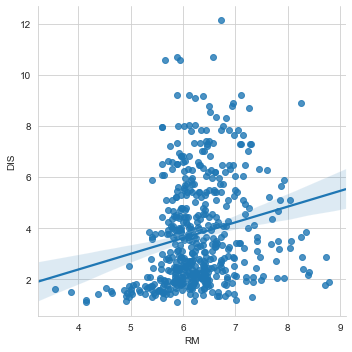

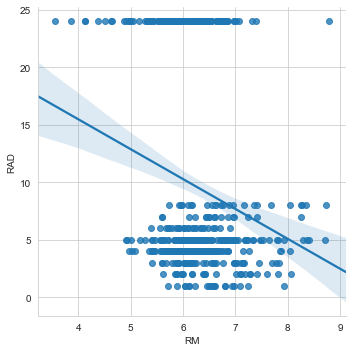

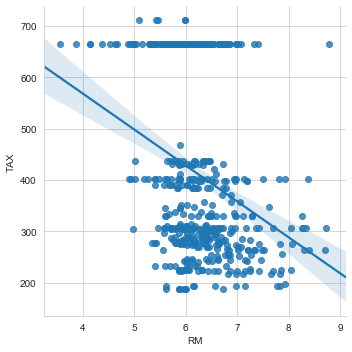

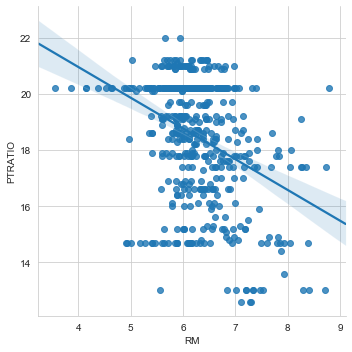

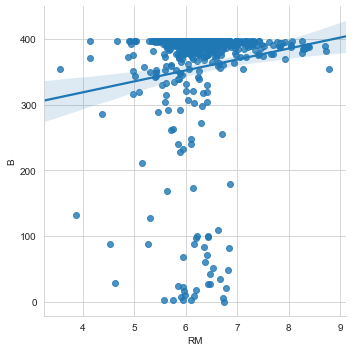

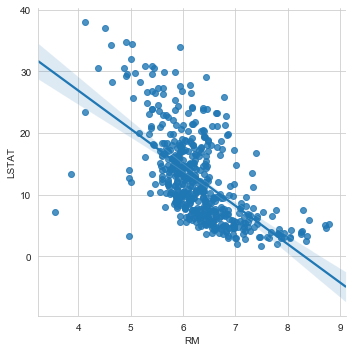

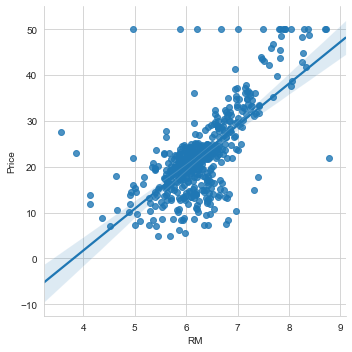

In [16]:
'''we can also plot linear fit line with scatter plot created above using 
seaborn package to check the linear relation bertween 2 variables'''

for i in boston_df.columns:
    if(i!='RM'):
        sns.lmplot('RM',i,data=boston_df)

In [70]:
#using numpy for a univariate linear regression
X = boston_df.RM
X = np.array([[value,1] for value in X])
Y = boston_df.Price

In [71]:
# intercept and regression coefficient (mx+c)
m, c = np.linalg.lstsq(X, Y)[0]

C:\Users\MLAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


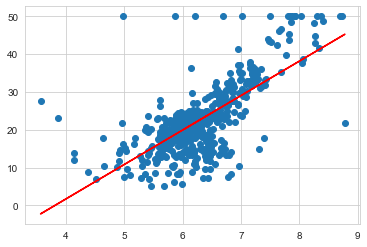

In [69]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, (m*x) + c, 'r', label='best fit line')

In [73]:
result = np.linalg.lstsq(X, Y)

C:\Users\MLAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [75]:
total_error = result[1]

In [76]:
mse = np.sqrt(total_error/len(X))

In [78]:
print("Total MSE: {}".format(mse))

Total MSE: [6.60307139]


In [81]:
import sklearn
from sklearn.linear_model import LinearRegression

In [82]:
lreg = LinearRegression()

In [ ]:
lreg.fit()

In [83]:
x_multi = boston_df.drop('Price',1)
y_target = boston_df.Price

In [87]:
lreg.fit(x_multi,y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lreg.coef_  # m-value for each column

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [89]:
lreg.intercept_ # c-value (y-intercept)

36.45948838509024

In [92]:
#create dataset showing all Coefficient Estimate values for each column
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

In [95]:
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

In [96]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [98]:
#use train and validation data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_multi,boston_df.Price)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [104]:
lreg = LinearRegression()

In [105]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)


In [109]:
#mse
np.mean((y_train - pred_train)**2)

19.69743894448014

In [110]:
#mse
np.mean((y_test - pred_test)**2)

28.975624489839937

Text(0.5, 1.0, 'Residual plots')

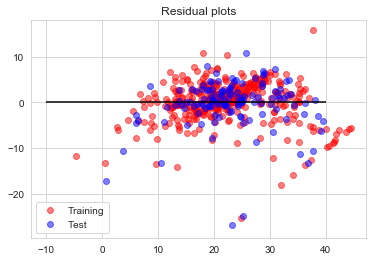

In [111]:
#plot our train and test data
train = plt.scatter(pred_train,(pred_train-y_train),c='r',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-y_test),c='b',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title("Residual plots")